# PROBLEM B1

 Given two arrays, train a neural network model to match the X to the Y.
 Predict the model with new values of X [-2.0, 10.0]
 We provide the model prediction, do not change the code.

 The test infrastructure expects a trained model that accepts
 an input shape of [1]
 Do not use lambda layers in your model.

 Please be aware that this is a linear model.
 We will test your model with values in a range as defined in the array to make sure your model is linear.

# Desired loss (MSE) < 1e-3

In [27]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping

print("GPUs Available: ", (tf.config.list_physical_devices('GPU')))
print("CPUs Available: ", (tf.config.list_physical_devices('CPU')))

GPUs Available:  []
CPUs Available:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [4]:
def solution_B1():
    # DO NOT CHANGE THIS CODE
    X = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], dtype=float)
    Y = np.array([5.0, 7.0, 9.0, 11.0, 13.0, 15.0, 17.0], dtype=float)

    # YOUR CODE HERE
    normalizer = tf.keras.layers.Normalization(axis=None, input_shape=(1,))
    normalizer.adapt(X)

    model = keras.Sequential()
    model.add(normalizer)
    model.add(keras.layers.Dense(32))
    model.add(keras.layers.Dense(1))

    model.compile(loss='mse', optimizer='adam')
    model.fit(X, Y, epochs=1000, callbacks=[keras.callbacks.EarlyStopping(monitor='loss', patience=10)])

    #print(model.predict([-2.0, 10.0]))
    print(model.predict(np.array([-2.0, 10.0])))

    return model

In [5]:
# The code below is to save your model as a .h5 file.
# It will be saved automatically in your Submission folder.
if __name__ == '__main__':
    # DO NOT CHANGE THIS CODE
    model = solution_B1()
    model.save("model_B1.h5")

Epoch 1/1000


c:\Users\srini\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\normalization.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step - loss: 141.4079
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 141.0714
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 140.7359
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 140.4015
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 140.0681
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 139.7357
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 139.4045
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 139.0743
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 138.7452
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 138.4171
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 138.0902
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 137.7642
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 137.4393
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 137.1154
Epoch 15/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - l

[[-1.0000737]
 [22.999962 ]]


# PROBLEM B2

 Build a classifier for the Fashion MNIST dataset.
 The test will expect it to classify 10 classes.
 The input shape should be 28x28 monochrome. Do not resize the data.
 Your input layer should accept (28, 28) as the input shape.

 Don't use lambda layers in your model.

# Desired accuracy AND validation_accuracy > 83%

In [6]:
import tensorflow as tf
import urllib.request
import numpy as np

In [7]:
def solution_B2():
    fashion_mnist = tf.keras.datasets.fashion_mnist

    # NORMALIZE YOUR IMAGE HERE
    (training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()
    training_images=training_images.reshape(60000, 28, 28, 1)
    training_images=training_images / 255.0
    test_images = test_images.reshape(10000, 28, 28, 1)
    test_images=test_images/255.0

    # DEFINE YOUR MODEL HERE
    # End with 10 Neuron Dense, activated by softmax
    model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
    ])

    # COMPILE MODEL HERE
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

    # TRAIN YOUR MODEL HERE
    model.fit(training_images, training_labels, validation_data=(test_images, test_labels), epochs=10, verbose=1)

    return model

In [8]:
# The code below is to save your model as a .h5 file.
# It will be saved automatically in your Submission folder.
if __name__ == '__main__':
    # DO NOT CHANGE THIS CODE
    model = solution_B2()
    model.save("model_B2.h5")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


c:\Users\srini\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7781 - loss: 0.6168 - val_accuracy: 0.8716 - val_loss: 0.3471
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8869 - loss: 0.3076 - val_accuracy: 0.8916 - val_loss: 0.2980
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9050 - loss: 0.2562 - val_accuracy: 0.8969 - val_loss: 0.2871
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9173 - loss: 0.2208 - val_accuracy: 0.9069 - val_loss: 0.2513
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9283 - loss: 0.1909 - val_accuracy: 0.9119 - val_loss: 0.2422
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9367 - loss: 0.1674 - val_accuracy: 0.9044 - val_loss: 0.2685
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9447 - loss: 0.1460 - val_accuracy: 0.9119 - val_loss: 0.2479
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9506 - loss: 0.1320 - val_accurac

# PROBLEM B3

 Build a CNN based classifier for Rock-Paper-Scissors dataset.
 Your input layer should accept 150x150 with 3 bytes color as the input shape.
 This is unlabeled data, use ImageDataGenerator to automatically label it.
 Don't use lambda layers in your model.

 The dataset used in this problem is created by Laurence Moroney (laurencemoroney.com).

# Desired accuracy AND validation_accuracy > 83%

In [9]:
import urllib.request
import zipfile
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.optimizers import Adam, RMSprop

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [10]:
def solution_B3():
    data_url = 'https://github.com/dicodingacademy/assets/releases/download/release-rps/rps.zip'
    urllib.request.urlretrieve(data_url, 'rps.zip')
    local_file = 'rps.zip'
    zip_ref = zipfile.ZipFile(local_file, 'r')
    zip_ref.extractall('data/')
    zip_ref.close()

    TRAINING_DIR = "data/rps/"
    VAL_DIR = "data/rps/"

    train_datagen = ImageDataGenerator(
        rescale=1/255,
        rotation_range=40,
        horizontal_flip=True,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest'
    )

    train_generator = train_datagen.flow_from_directory(
        TRAINING_DIR,
        class_mode='categorical',
        batch_size=64,
        target_size=(150, 150))

    test_datagen = ImageDataGenerator(rescale=1./255)

    validation_generator = test_datagen.flow_from_directory(VAL_DIR,
                                                            class_mode='categorical',
                                                            batch_size=32,
                                                            target_size=(150, 150))

    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('accuracy') > 0.83 and logs.get('val_accuracy') > 0.83):
                print("\n Accuracy is more than 83%, stopping...")
                self.model.stop_training = True

    customCallback = myCallback()

    model = tf.keras.models.Sequential([
        # YOUR CODE HERE, end with 3 Neuron Dense, activated by softmax
        Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        MaxPooling2D(2, 2),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(512, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])

    model.compile(
        optimizer=RMSprop(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy'])

    model.fit(train_generator, epochs=10, verbose=1,
              validation_data=validation_generator, callbacks=[customCallback])

    return model

In [11]:
# The code below is to save your model as a .h5 file.
# It will be saved automatically in your Submission folder.
if __name__ == '__main__':
    model = solution_B3()
    model.save("model_B3.h5")

Found 2520 images belonging to 3 classes.
Found 2520 images belonging to 3 classes.
Epoch 1/10


c:\Users\srini\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 336ms/step - accuracy: 0.4104 - loss: 1.0797 - val_accuracy: 0.8353 - val_loss: 0.5292
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 332ms/step - accuracy: 0.6998 - loss: 0.6974 - val_accuracy: 0.8456 - val_loss: 0.3734
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - accuracy: 0.7863 - loss: 0.5350
 Accuracy is more than 83%, stopping...
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 323ms/step - accuracy: 0.7879 - loss: 0.5315 - val_accuracy: 0.8639 - val_loss: 0.2891


# PROBLEM B4

 Build and train a classifier for the BBC-text dataset.
 This is a multiclass classification problem.
 Do not use lambda layers in your model.

 The dataset used in this problem is originally published in: http://mlg.ucd.ie/datasets/bbc.html.

# Desired accuracy and validation_accuracy > 91%

In [12]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import pandas as pd
import numpy as np

In [17]:
def solution_B4():
    bbc = pd.read_csv("https://github.com/dicodingacademy/assets/raw/main/Simulation/machine_learning/bbc-text.csv")

    # DO NOT CHANGE THIS CODE
    # Make sure you used all of these parameters or you can not pass this test
    vocab_size = 1000
    embedding_dim = 16
    trunc_type = 'post'
    padding_type = 'post'
    oov_tok = "<OOV>"
    training_portion = .8

    sentence = []
    labels = []

    for index, row in bbc.iterrows():
        labels.append(row[0])
        sentence.append(row[1])

    train_size = int(len(sentence) * training_portion)

    train_sentence = sentence[: train_size]
    train_labels = labels[: train_size]

    validation_sentence = sentence[train_size:]
    validation_labels = labels[train_size:]

    tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
    tokenizer.fit_on_texts(train_sentence)
    word_index = tokenizer.word_index
    train_sequences = tokenizer.texts_to_sequences(train_sentence)
    train_padded = pad_sequences(train_sequences, padding=padding_type, truncating=trunc_type)
    validation_sequences = tokenizer.texts_to_sequences(validation_sentence)
    validation_padded = pad_sequences(validation_sequences, padding=padding_type,
                                      truncating=trunc_type)
    label_tokenizer = Tokenizer()
    label_tokenizer.fit_on_texts(labels)
    training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
    validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dense(6, activation='softmax')
    ])

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    history = model.fit(train_padded,
                        training_label_seq,
                        epochs=200,
                        validation_data=(validation_padded, validation_label_seq))


    return model

In [18]:
# The code below is to save your model as a .h5 file.
# It will be saved automatically in your Submission folder.
if __name__ == '__main__':
    # DO NOT CHANGE THIS CODE
    model = solution_B4()
    model.save("model_B4.h5")

C:\Users\srini\AppData\Local\Temp\ipykernel_24564\1095530425.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels.append(row[0])
C:\Users\srini\AppData\Local\Temp\ipykernel_24564\1095530425.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sentence.append(row[1])


Epoch 1/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2223 - loss: 1.6857 - val_accuracy: 0.2202 - val_loss: 1.6207
Epoch 2/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2447 - loss: 1.6270 - val_accuracy: 0.2427 - val_loss: 1.5956
Epoch 3/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2273 - loss: 1.6012 - val_accuracy: 0.3438 - val_loss: 1.5619
Epoch 4/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2389 - loss: 1.5953 - val_accuracy: 0.2787 - val_loss: 1.5689
Epoch 5/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2465 - loss: 1.5861 - val_accuracy: 0.2404 - val_loss: 1.6055
Epoch 6/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2620 - loss: 1.5946 - val_accuracy: 0.2719 - val_loss: 1.5429
Epoch 7/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2214 - loss: 1.5911 - val_accuracy: 0.1820 - val_loss: 1.5989
Epoch 8/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2804 - loss: 1.5745 - val_accuracy: 0.2225 - v

# PROBLEM B5

 Build and train a neural network model using the Daily Max Temperature.csv dataset.
 Use MAE as the metrics of your neural network model.
 We provided code for normalizing the data. Please do not change the code.
 Do not use lambda layers in your model.

 The dataset used in this problem is downloaded from https://github.com/jbrownlee/Datasets

# Desired MAE < 0.2 on the normalized dataset.

In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import csv
import urllib

from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import SGD

In [23]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

def compute_metrics(true_series, forecast):
    mse = tf.keras.metrics.mean_squared_error(true_series, forecast).numpy()
    mae = tf.keras.metrics.mean_absolute_error(true_series, forecast).numpy()
    return mse, mae

def solution_B5():
    data_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-max-temperatures.csv'
    urllib.request.urlretrieve(data_url, 'daily-max-temperatures.csv')

    time_step = []
    temps = []

    with open('daily-max-temperatures.csv') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        next(reader)
        step = 0
        for row in reader:
            temps.append(row[1])
            time_step.append(row[0])
            step=step + 1

    series=np.array(temps, dtype=float)

    # Normalization Function. DO NOT CHANGE THIS CODE
    min=np.min(series)
    max=np.max(series)
    series -= min
    series /= max
    time=np.array(time_step)

    # DO NOT CHANGE THIS CODE
    split_time=2400 #2500 2400

    time_train = time[:split_time]
    x_train = series[:split_time]
    time_valid = time[split_time:]
    x_valid = series[split_time:]

    # DO NOT CHANGE THIS CODE
    window_size=400 #400 300
    batch_size=128 #128 32
    shuffle_buffer_size=1000 #16 1000

    train_set=windowed_dataset(
        x_train, window_size, batch_size, shuffle_buffer_size)
    print(train_set)
    print(x_train.shape)

    val_set = windowed_dataset(
        x_valid, window_size, batch_size, shuffle_buffer_size)

    model = tf.keras.Sequential([
        tf.keras.layers.Conv1D(filters=128, kernel_size=5, strides=1, activation="relu", padding='causal', input_shape=[None, 1]),
        #tf.keras.layers.GRU(128, recurrent_initializer = 'glorot_uniform', return_sequences=True), #recurrent_initializer = 'glorot_uniform'
        tf.keras.layers.GRU(128, recurrent_initializer = 'glorot_uniform'),
        tf.keras.layers.Dense(units=128, activation='relu'),
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dense(units=1)
    ])

    # YOUR CODE HERE
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='min')
    lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-6 * 10**(epoch / 10))
    learning_rate=.10
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)
    #optimizer = tf.keras.optimizers.Adam()
    model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=optimizer, metrics=[tf.keras.metrics.MeanAbsoluteError()])

    history = model.fit(train_set, epochs=70, callbacks=[lr_schedule], validation_data=val_set)

    # Plot the predictions against the actual values
    test_set = windowed_dataset(
        x_valid, window_size, batch_size, shuffle_buffer_size)
    test_pred = model.predict(test_set).flatten()

    # Take the first 500 (2000) samples from the test set
    test_pred = test_pred[:500]
    test_truth = x_valid[:500]
    # test_truth=series[:500]
    # Plot the actual values against the predictions
    #plt.plot(test_truth, label='actual')
    #plt.plot(test_pred, label='predicted')
    #plt.legend()
    #plt.show()

    plt.semilogx(history.history["learning_rate"], history.history["loss"])
    plt.plot(history.history["learning_rate"], history.history["loss"])
    plt.axis([1e-6, 10, 0, 0.1])

    mse, mae = compute_metrics(test_truth, test_pred)
    print(f"mse: {mse:.2f}, mae: {mae:.2f} for forecast")

    return model

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))>
(2400,)
Epoch 1/70
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 373ms/step - loss: 0.1139 - mean_absolute_error: 0.3069 - val_loss: 0.1051 - val_mean_absolute_error: 0.3180 - learning_rate: 1.0000e-06
Epoch 2/70
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 351ms/step - loss: 0.1144 - mean_absolute_error: 0.3075 - val_loss: 0.1049 - val_mean_absolute_error: 0.3176 - learning_rate: 1.2589e-06
Epoch 3/70
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 342ms/step - loss: 0.1139 - mean_absolute_error: 0.3068 - val_loss: 0.1046 - val_mean_absolute_error: 0.3172 - learning_rate: 1.5849e-06
Epoch 4/70
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 364ms/step - loss: 0.1135 - mean_absolute_error: 0.3062 - val_loss: 0.1044 - val_mean_absolute_error: 0.3166 - learning_rate: 1.9953e-06
Epoch 5/70
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 352ms/step - loss: 0.1135 - mean_absolute_error: 0.3060 - val_loss: 0.1040 - v

mse: nan, mae: nan for forecast


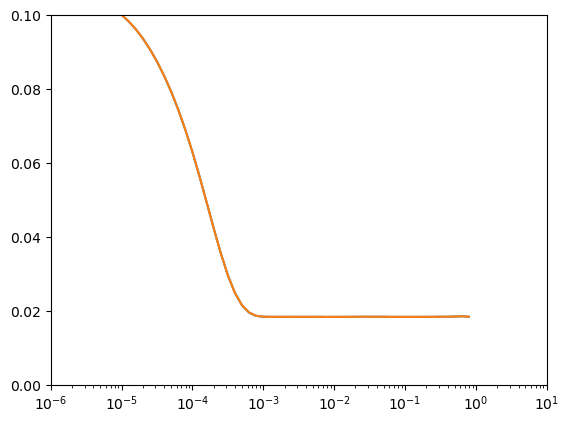

In [24]:
if __name__ == '__main__':
    # DO NOT CHANGE THIS CODE
    model=solution_B5()
    model.save("model_B5.h5")